In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats
import numpy as np

In [2]:
diabetes_data = datasets.load_diabetes(as_frame=True)
feature_name_list = diabetes_data.feature_names
baseline_progression = diabetes_data.target
#print(baseline_progression)
#print(diabetes_data)
print(feature_name_list)
print(diabetes_data.DESCR)
diabetes_data = diabetes_data.frame.to_numpy()
diabetes_data = diabetes_data[:, 0:10]  

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(diabetes_data)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, bloo

Average baseline progression is 152.13348416289594
STD of 77.00574586945044


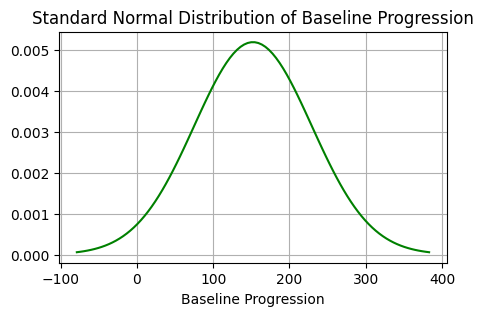

In [3]:

baseline_progression_mean = np.mean(baseline_progression)
print(f"Average baseline progression is {baseline_progression_mean}")
baseline_progression_std = np.std(baseline_progression)
print(f"STD of {baseline_progression_std}")

def plot_standard_distrb(mean, std):
    x = np.linspace(
        mean - 3 * std,
        mean + 3 * std,
        100
    )

    # Compute the standard normal distribution (PDF)
    y = stats.norm.pdf(x, mean, std)

    # Plot the normal distribution
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, color="green")
    plt.xlabel("Baseline Progression")
    #plt.ylabel("Probability Density")
    plt.title("Standard Normal Distribution of Baseline Progression")
    plt.grid()
    plt.show()

plot_standard_distrb(baseline_progression_mean, baseline_progression_std)

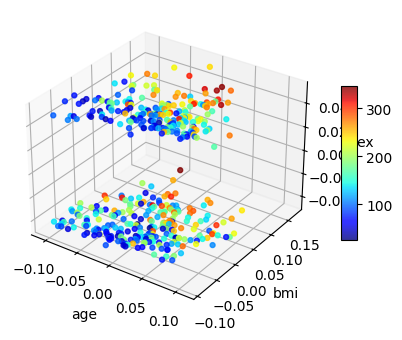

In [4]:
def plot_3d(index_1, index_2, index_3, diabetes_data, baseline_progression):
    x = diabetes_data[:, index_1]
    y = diabetes_data[:, index_2]
    z = diabetes_data[:, index_3]

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x, y, z, c=baseline_progression, s=50, cmap='jet', marker='.', alpha=0.8)

    cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
    #cbar.set_label("Baseline Progression")

    ax.set_xlabel(feature_name_list[index_1])
    ax.set_ylabel(feature_name_list[index_2])
    ax.set_zlabel(feature_name_list[index_3])
    #ax.set_title("3D Scatter Plot of Select Features \n Basline Diabetes Progression as Colobar")
    ax.view_init(elev=30, azim=-55)

    plt.show()

plot_3d(0, 2, 1, diabetes_data, baseline_progression)

In [5]:
def count(labels, print_):
    counter_dict = {}
    for label in labels:
        if not label in counter_dict:
            counter_dict[label] = 1
        else:
            counter_dict[label] += 1
    for key, count in counter_dict.items():
        if print_:
            print(f"Label {key} has {count} appearences")
    
    minus_ones = 0
    if -1 in counter_dict:
        minus_ones = counter_dict[-1]
        
    return len(counter_dict), minus_ones

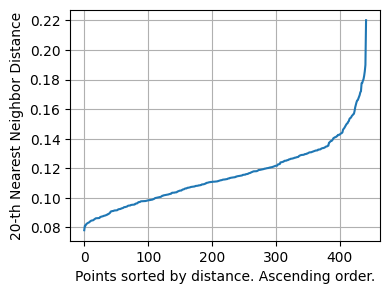

In [6]:
############################ We find suitable parameters for DBSCAN using NearestNeighbors #####
k = int(2 * diabetes_data.shape[1])
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(diabetes_data)

all_distances_for_each_point, _ = nn_model.kneighbors(diabetes_data)
sorted_distances = np.sort(all_distances_for_each_point[:, -1])  # sort ascending

plt.figure(figsize=(4, 3))
plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance. Ascending order.")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
#plt.title("Elbow Method for Choosing epsilon in DBSCAN")
plt.grid()
plt.show()

In [7]:
#### Use brute force to find any suitable parameters...
epsilon_values = np.linspace(0.04, 0.40, 300)
k_values = np.arange(10, 80)

cluster_list = []
max_clusters = 0
clusters_sought = 5

for k_s in k_values:
    for epsi in epsilon_values:
        dbscanner = DBSCAN(min_samples=k_s, eps=epsi)
        dbscanner.fit(diabetes_data)
        cluster_belongings = dbscanner.labels_
        counted_clusters, minus_ones = count(cluster_belongings, print_=False)

        if counted_clusters > max_clusters:
            max_clusters = counted_clusters
            print(f"New max clusters of {max_clusters} found using k={k_s} and eps = {epsi}. Also {minus_ones} -1's")

        if counted_clusters >= clusters_sought:
            print(f"Found {counted_clusters} clusters with k={k_s} and eps={epsi}. Also {minus_ones} -1's")

New max clusters of 1 found using k=10 and eps = 0.04. Also 442 -1's
New max clusters of 2 found using k=10 and eps = 0.06769230769230769. Also 432 -1's
New max clusters of 4 found using k=10 and eps = 0.06889632107023412. Also 406 -1's
New max clusters of 5 found using k=10 and eps = 0.07491638795986623. Also 297 -1's
Found 5 clusters with k=10 and eps=0.07491638795986623. Also 297 -1's
Found 5 clusters with k=11 and eps=0.07612040133779265. Also 296 -1's
Found 5 clusters with k=11 and eps=0.07732441471571908. Also 291 -1's
New max clusters of 6 found using k=12 and eps = 0.07732441471571908. Also 298 -1's
Found 6 clusters with k=12 and eps=0.07732441471571908. Also 298 -1's
Found 5 clusters with k=14 and eps=0.07612040133779265. Also 372 -1's
Found 5 clusters with k=14 and eps=0.07732441471571908. Also 359 -1's
Found 5 clusters with k=14 and eps=0.07973244147157191. Also 288 -1's
Found 5 clusters with k=17 and eps=0.08093645484949834. Also 326 -1's
Found 5 clusters with k=17 and eps=

In [7]:
dbscanner = DBSCAN(min_samples=14, eps=0.07973244147157191)
dbscanner.fit(diabetes_data)
cluster_belongings = dbscanner.labels_
counted_clusters, minus_ones = count(cluster_belongings, print_=True)
print(f"\nClusters found {counted_clusters}. Also {minus_ones} -1's \n")

baseline_beloning_dict = {}
for i in range(len(baseline_progression)):
    if not cluster_belongings[i] in baseline_beloning_dict:
        baseline_beloning_dict[cluster_belongings[i]] = []
        baseline_beloning_dict[cluster_belongings[i]].append(baseline_progression[i])
    else:
        baseline_beloning_dict[cluster_belongings[i]].append(baseline_progression[i])

for label, baseline_list in baseline_beloning_dict.items():
    print(f"Label {label} has a average baseline progression of {np.mean(baseline_list)}")

Label 2 has 84 appearences
Label 0 has 55 appearences
Label -1 has 288 appearences
Label 1 has 6 appearences
Label 3 has 9 appearences

Clusters found 5. Also 288 -1's 

Label 2 has a average baseline progression of 150.70238095238096
Label 0 has a average baseline progression of 116.52727272727273
Label -1 has a average baseline progression of 159.88888888888889
Label 1 has a average baseline progression of 149.16666666666666
Label 3 has a average baseline progression of 136.88888888888889


In [8]:
indices_group_0 = np.where(np.array(cluster_belongings) == 2)[0]
non_scaled_data = datasets.load_diabetes(as_frame=True).frame.to_numpy()

group_0_data = non_scaled_data[indices_group_0, :]

for i in range(len(feature_name_list)):
    overall_mean = np.mean(non_scaled_data[:, i])
    overall_var = np.var(non_scaled_data[:, i])

    group_0_mean = np.mean(group_0_data[:, i])
    group_0_var = np.var(group_0_data[:, i])

    print(f"{feature_name_list[i]}. Overall mean {overall_mean:.1f}. Identified group mean {group_0_mean:4f}")
    print(f"{feature_name_list[i]}. Overall var {overall_var:.4f}. Identified group var {group_0_var:.4f}")

age. Overall mean -0.0. Identified group mean 0.025405
age. Overall var 0.0023. Identified group var 0.0009
sex. Overall mean 0.0. Identified group mean 0.050680
sex. Overall var 0.0023. Identified group var 0.0000
bmi. Overall mean -0.0. Identified group mean -0.000535
bmi. Overall var 0.0023. Identified group var 0.0010
bp. Overall mean -0.0. Identified group mean 0.014249
bp. Overall var 0.0023. Identified group var 0.0013
s1. Overall mean -0.0. Identified group mean -0.006205
s1. Overall var 0.0023. Identified group var 0.0008
s2. Overall mean 0.0. Identified group mean 0.004856
s2. Overall var 0.0023. Identified group var 0.0008
s3. Overall mean -0.0. Identified group mean -0.021662
s3. Overall var 0.0023. Identified group var 0.0008
s4. Overall mean -0.0. Identified group mean 0.010038
s4. Overall var 0.0023. Identified group var 0.0010
s5. Overall mean 0.0. Identified group mean 0.001571
s5. Overall var 0.0023. Identified group var 0.0008
s6. Overall mean 0.0. Identified group m

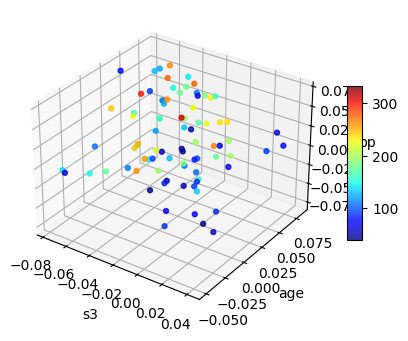

In [11]:
plot_3d(6, 0, 3, non_scaled_data[indices_group_0, :], baseline_progression[indices_group_0])

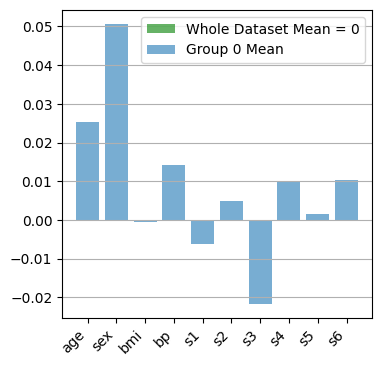

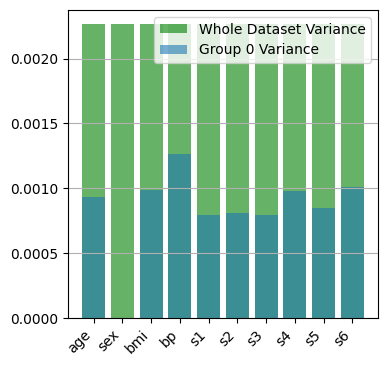

In [96]:
features = feature_name_list
overall_means = [np.mean(non_scaled_data[:, i]) for i in range(len(feature_name_list))]
group_0_means = [np.mean(group_0_data[:, i]) for i in range(len(feature_name_list))]

overall_vars = [np.var(non_scaled_data[:, i]) for i in range(len(feature_name_list))]
group_0_vars = [np.var(group_0_data[:, i]) for i in range(len(feature_name_list))]

plt.figure(figsize=(4, 4))
plt.bar(features, overall_means, alpha=0.6, color="green", label="Whole Dataset Mean = 0")
plt.bar(features, group_0_means, alpha=0.6, label="Group 0 Mean")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(4, 4))
plt.bar(features, overall_vars, alpha=0.6, color="green", label="Whole Dataset Variance")
plt.bar(features, group_0_vars, alpha=0.6, label="Group 0 Variance")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis='y')
plt.show()